# Pipette's set up

You can run standard plotting options for avst and cv files in tdms format &
Analyze the mean

In [1]:
#basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns; sns.set()
import json
import os
import sys
import nptdms
import csv
from nptdms import TdmsFile
import time
from scipy import signal

from numpy import where
from numpy.fft import fft, rfft
from scipy.signal import spectrogram
from pylab import *
import matplotlib.cbook as cbook
from scipy.optimize import curve_fit



In [2]:
# give the path to the cv folder of the pipette

path=r"C:\Users\fyz15\OneDrive\Documents\ETH\pipette-data-analysis-main\Data\16-7-22\16-7-22\14-7-22-Da3-st_add\baseline\avst"

In [3]:
#Annina's part of the code for the labelling 
def make_label(folder):
    '''
    creates a label using the name or folder given, adding _i to it and removing any backslashes.
    '''
    return os.sep.join([folder, '_i']).replace("\\", "" ) 
def add_time_column(df,step=0.00257):
    #step=df['dt(s)'].mean()
    df['time']=df.index*step
    df['time']=df['time'].round(6)
    return df

Read CV

In [4]:
def read_cv(index):
    tdms_file1 = TdmsFile.read(path + r"\CV_" + str(index) + r".tdms")
    

    group1 = tdms_file1["Data"]
    df = pd.DataFrame()


    channels=['V1 (V)','Current1 (A)', 'Line Number']




    for c1 in group1:
        if len(channels)>0:
            if c1 in channels:
                df[c1] = group1[c1][:]
        else:
            df[c1] = group1[c1][:]

              
    df=df[['Current1 (A)','V1 (V)']]

    return df

def read_cv():
    tdms_file1 = TdmsFile.read(path + r"\CV.tdms")
    

    group1 = tdms_file1["Data"]
    df = pd.DataFrame()


    channels=['V1 (V)','Current1 (A)']

    for c1 in group1:
        if len(channels)>0:
            if c1 in channels:
                df[c1] = group1[c1][:]
        else:
            df[c1] = group1[c1][:]

              
    df=df[['Current1 (A)','V1 (V)']]

    return df

Read avst

In [5]:
def read_avst():
    #read single tdms file with precise directory
    tdms_file1 = TdmsFile.read(path + r"\avst.tdms")
    #display the names of the colums in the saved files
    group1 = tdms_file1["Data"]


    df1 = pd.DataFrame()

    df1=add_time_column(df1,step)


    channels=['V1 (V)','Current1 (A)', 'Line Number', 'time_nounits']

#copy the data from the tdms data to dataframe of pandas

    for c1 in group1:
        if len(channels)>0:
            if c1 in channels:
                df1[c1] = group1[c1][:]
        else:
            df1[c1] = group1[c1][:]

    dt1=np.arange(int(len(df1)))
    t1=dt1 *0.00257
    df1['time_nounits']=t1
    df=df1[['Current1 (A)','time_nounits']]
    
    return df

Resample


In [6]:
#applicable for timeseries
def resample_pandas(df):
    res_df=df.resample()
    return res_df
#applicable to any type of data
def resample_each_n(df,n):
    res_df=df.iloc[::int(n), :]
    return res_df

Plot

In [7]:
def plot_df_cv(df,xlabel,ylabel,title, col ="b"):
    df=df.set_index('V1 (V)')
    plt.rcdefaults()
    fig = plt.figure(figsize=(20,8),facecolor=(1, 1, 1),edgecolor=(1,1,1))



    # Plotting both the curves simultaneously
    plt.plot(df, color=col)
    #plt.plot(df_dev, color='b', label='iPBS')
    plt.xlabel(str(xlabel))#,size=text_size)
    plt.ylabel(str(ylabel))#, size=text_size)
    plt.title(str(title))
    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()
    plt.grid()
    # To load the display window
    plt.show()

def plot_df_mult_cv(df1,df2,xlabel,ylabel,title,lbdf1,lbdf2):
    df1=df1.set_index('V1 (V)')
    df2=df2.set_index('V1 (V)')


    plt.rcdefaults()
    fig = plt.figure(figsize=(20,8),facecolor='w',edgecolor='w')



    # Plotting both the curves simultaneously
    plt.plot(df1, color='r', label=str(lbdf1))
    plt.plot(df2, color='g', label=str(lbdf2))

        
    plt.xlabel(str(xlabel))#,size=text_size)
    plt.ylabel(str(ylabel))#, size=text_size)
    plt.title(str(title))
    plt.legend()
    plt.grid()
    # To load the display window
    plt.show()
    
def plot_mult_cv_inv(df1,df2,xlabel,ylabel,title,lbdf1,lbdf2, color1='blue',color2='orchid'):
    
    df1=df1.set_index('V1 (V)')
    df2=df2.set_index('V1 (V)')


    plt.rcdefaults()
    fig = plt.figure(figsize=(15,8),facecolor='w',edgecolor='w')



    # Plotting both the curves simultaneously
    plt.plot(df1, str(color1), label=str(lbdf1))
    plt.plot(df2, str(color2), label=str(lbdf2))
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlabel(str(xlabel))#,size=text_size)
    plt.ylabel(str(ylabel))#, size=text_size)
    plt.title(str(title))
    plt.legend()
    #plt.grid()
    # To load the display window
    plt.show()  
 

def plot_mult_cv_inv_fit(df1,df2,xlabel,ylabel,title,lbdf1,lbdf2, color1='blue',color2='orchid'):
    
    df1=df1.set_index('V1 (V)')
    df2=df2.set_index('V1 (V)')


    plt.rcdefaults()
    fig = plt.figure(figsize=(15,8),facecolor='w',edgecolor='w')


    plt.rcParams['figure.facecolor'] = '#f0fcfc'
    # Plotting both the curves simultaneously
    plt.plot(df1, str(color1), label=str(lbdf1),linewidth=4)
    plt.plot(df2, str(color2), label=str(lbdf2),linewidth=4)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlabel(str(xlabel))#,size=text_size)
    plt.ylabel(str(ylabel))#, size=text_size)
    plt.title(str(title))
    plt.legend()
    #plt.grid()
    # To load the display window
    plt.show()  

    
    
    
    
def plot_df_mult_cv3(df1,df2,df3,xlabel,ylabel,title,lbdf1,lbdf2,lbdf3):
    df1=df1.set_index('V1 (V)')
    df2=df2.set_index('V1 (V)')
    df3=df3.set_index('V1 (V)')


    fig = plt.figure(figsize=(20,8),facecolor='w',edgecolor='w')



    # Plotting both the curves simultaneously
    plt.plot(df1, color='r', label=str(lbdf1))
    plt.plot(df2, color='g', label=str(lbdf2))
    plt.plot(df3, color='b', label=str(lbdf3))

        
    plt.xlabel(str(xlabel))#,size=text_size)
    plt.ylabel(str(ylabel))#, size=text_size)
    plt.title(str(title))
    plt.legend()
  
    # To load the display window
    plt.show()
    
    
    
def plot_3_avst(df1,df2,df3,xlabel,ylabel,title,lbdf1,lbdf2,lbdf3):
    
    #df1=df1.set_index('time_nounits')
    #df2=df2.set_index('time_nounits')
    #df3=df3.set_index('time_nounits')
    
    fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
    axs[0].plot(df1, color='r', label=str(lbdf1))

    axs[1].plot(df2, color='g', label=str(lbdf2))
    axs[2].plot(df3, color='b', label=str(lbdf3))
    fig.suptitle(str(title))
    plt.show()
    
def plot_avst(df1,xlabel,ylabel,title,lbdf1):
    #df1=df1.set_index('time_nounits')
    plt.plot(df1, color='black', label=str(lbdf1))

    plt.xlabel(str(xlabel))#,size=text_size)
    plt.ylabel(str(ylabel))#, size=text_size)
    plt.title(str(title))
    plt.legend()
  
    # To load the display window
    plt.show()

In [8]:
#normalisation 
def normalise_wrt_df_b(df_baseline,df_target, rmin_b, rmax_b, rmin_t , rmax_t, name):

    df_b = resample_each_n(df_baseline,100)
    df_t = resample_each_n(df_target,100)

    df_b=df_b.set_index('time_nounits')
    df_t=df_t.set_index('time_nounits')

    cut_df_b = df_b[int(rmin_b):int(rmax_b)]
    cut_df_t = df_t[int(rmin_t):int(rmax_t)]
    fig = plt.figure(figsize=(20,8),facecolor='w',edgecolor='w')   
    plt.plot(df_b, color='black', label='baseline')
    plt.plot(df_t, color='green', label='target')
    plt.show()
    ## normalised with NC
    mean_cut_df_b = cut_df_b.mean()
    norm_cut_df_t = (cut_df_t-mean_cut_df_b )/(0-mean_cut_df_b )

    plot_avst(norm_cut_df_t,'time (sec)', 'Current (A)', 'AVST normalisation wrt mean baseline',str(name))
    return norm_cut_df_t

def objective(x, a, b):
    return a * x + b

#standard addition for 5 points
def stadd(df_t,df_1,c1,df_2,c2,df_3,c3,df_4,c4,df_5,c5, name):
    st_add=pd.DataFrame()
    conc_range=range(0,int(c5)+1)
    st_add['Concentration']=conc_range
    st_add.set_index('Concentration')
    st_add['Mean']=np.nan
    st_add['Mean'][0]=float(df_t.mean())
    st_add['Mean'][int(c1)]=float(df_1.mean())
    st_add['Mean'][int(c2)]=float(df_2.mean())
    st_add['Mean'][int(c3)]=float(df_3.mean())
    st_add['Mean'][int(c4)]=float(df_4.mean())
    st_add['Mean'][int(c5)]=float(df_5.mean())
    st_add['Std']=np.nan
    st_add['Std'][0]=float(df_t.std())
    st_add['Std'][int(c1)]=float(df_1.std())
    st_add['Std'][int(c2)]=float(df_2.std())
    st_add['Std'][int(c3)]=float(df_3.std())
    st_add['Std'][int(c4)]=float(df_4.std())
    st_add['Std'][int(c5)]=float(df_5.std())
    
    
    
    
    st_add_clean=st_add.dropna()
    fig = plt.figure(figsize=(15,8),facecolor=(1, 1, 1),edgecolor=(1,1,1))
    popt, _ = curve_fit(objective, st_add_clean['Concentration'], st_add_clean['Mean'])
    # summarize the parameter values
    a, b = popt
    print('y = %.5f * x + %.5f' % (a, b))
    # define a sequence of inputs between the smallest and largest known inputs
    x_line = arange(-20,int(c5)+1, 1)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '--', color='red')


    plt.axvline(x = 0, color = 'black')
    plt.errorbar(st_add_clean['Concentration'], st_add_clean['Mean'], st_add_clean['Std'],ecolor='orchid', linestyle='None', marker='o')
    #plt.grid()
    plt.xlim([-20, 16])
    plt.ylim([0, 0.34])


    plt.xlabel('Dopamine concentration [pM]')#,size=text_size)
    plt.ylabel('ΔI/I')#, size=text_size)
    plt.title(str(name))
    plt.legend(fontsize=50)
    plt.legend()
    plt.grid()
    plt.show()
    
    return st_add





#standard addition for 4 points
def stadd_4(df_t,df_1,c1,df_2,c2,df_3,c3,df_4,c4,df_5,c5, name):
    st_add=pd.DataFrame()
    conc_range=range(0,int(c4)+1)
    st_add['Concentration']=conc_range
    st_add.set_index('Concentration')
    st_add['Mean']=np.nan
    st_add['Mean'][0]=float(df_t.mean())
    st_add['Mean'][int(c1)]=float(df_1.mean())
    st_add['Mean'][int(c2)]=float(df_2.mean())
    st_add['Mean'][int(c3)]=float(df_3.mean())
    st_add['Mean'][int(c4)]=float(df_4.mean())

    st_add['Std']=np.nan
    st_add['Std'][0]=float(df_t.std())
    st_add['Std'][int(c1)]=float(df_1.std())
    st_add['Std'][int(c2)]=float(df_2.std())
    st_add['Std'][int(c3)]=float(df_3.std())
    st_add['Std'][int(c4)]=float(df_4.std())

    
    
    
    
    st_add_clean=st_add.dropna()
    fig = plt.figure(figsize=(15,8),facecolor=(1, 1, 1),edgecolor=(1,1,1))
    popt, _ = curve_fit(objective, st_add_clean['Concentration'], st_add_clean['Mean'])
    # summarize the parameter values
    a, b = popt
    print('y = %.5f * x + %.5f' % (a, b))
    # define a sequence of inputs between the smallest and largest known inputs
    x_line = arange(-10,int(c5)+1, 1)
    # calculate the output for the range
    y_line = objective(x_line, a, b)
    # create a line plot for the mapping function
    plt.plot(x_line, y_line, '--', color='red')


    plt.axvline(x = 0, color = 'black')
    plt.errorbar(st_add_clean['Concentration'], st_add_clean['Mean'], st_add_clean['Std'],ecolor='orchid', linestyle='None', marker='o')
    #plt.grid()
    plt.xlim([-500, 350])
    plt.ylim([-0.03, 0.3])


    plt.xlabel('Dopamine concentration [pM]')#,size=text_size)
    plt.ylabel('ΔI/I')#, size=text_size)
    plt.title(str(name))
    
    plt.legend()
    plt.grid()
    plt.show()
    
    return st_add

# Try code example

## CV clinical samples


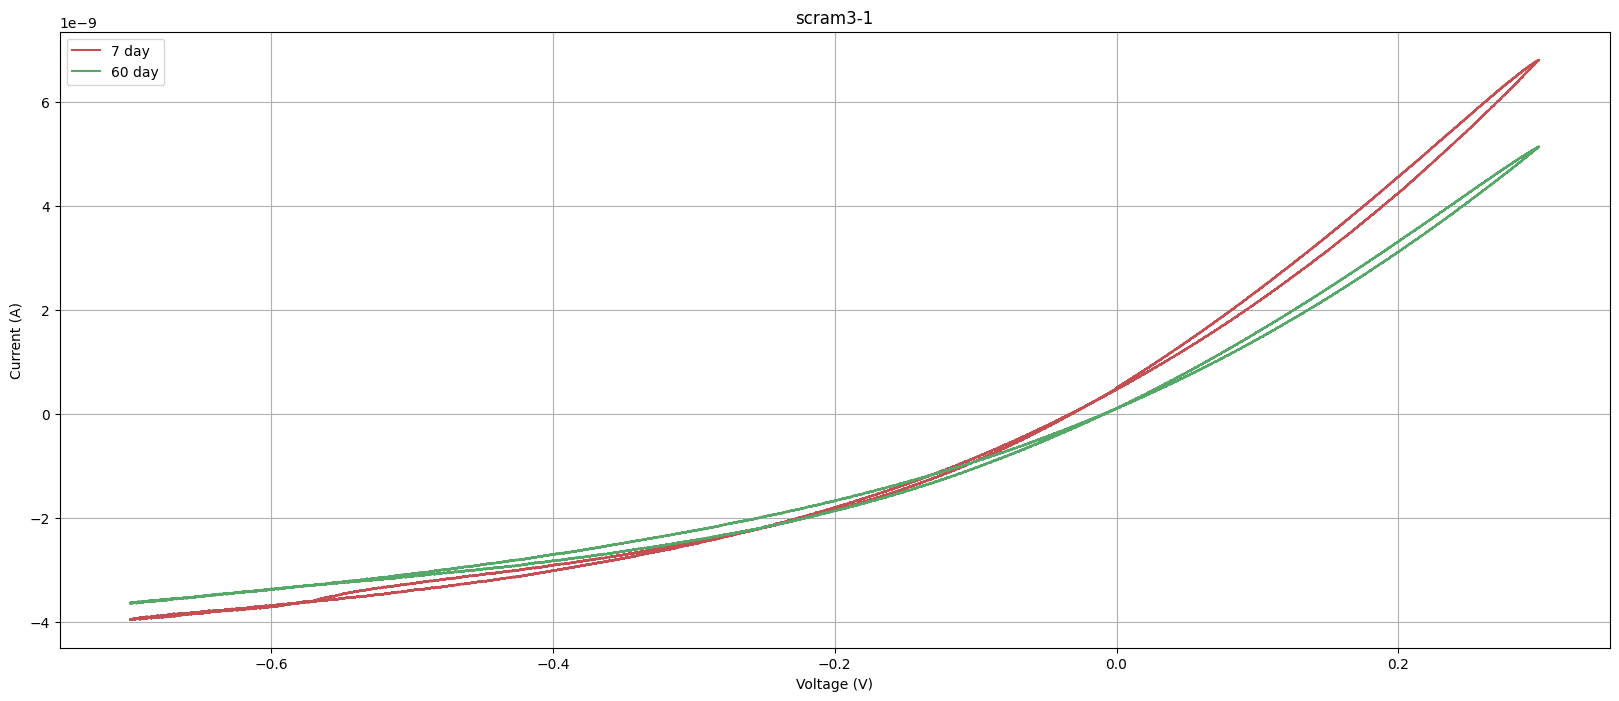

In [11]:
path=r"C:\Users\fyz15\OneDrive\Documents\ETH\pipette-data-analysis-main\Data\1-7-22\1-7-22\scram\NC\cv"
scram3_1_NC=read_cv()
path=r"C:\Users\fyz15\OneDrive\Documents\ETH\pipette-data-analysis-main\Data\1-7-22\1-7-22\scram\Dop\cv"
scram3_1_Dop=read_cv()
plot_df_mult_cv(scram3_1_NC,scram3_1_Dop,'Voltage (V)','Current (A)','scram3-1','7 day','60 day')

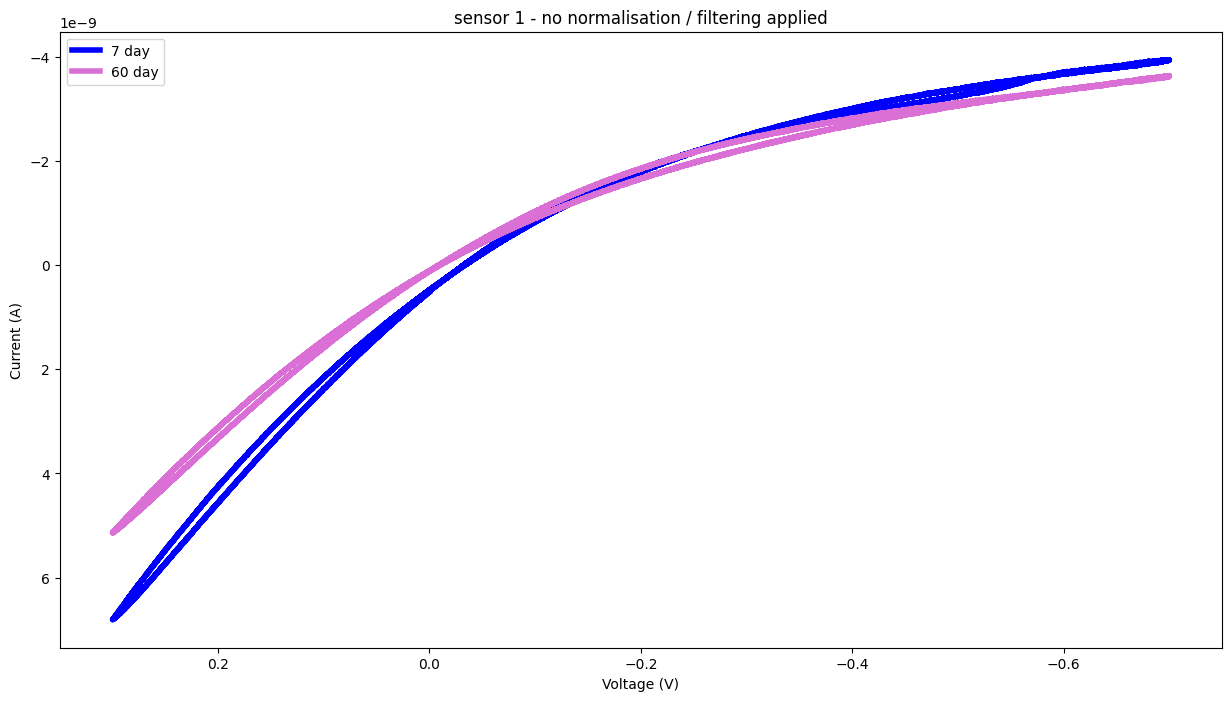

In [13]:
plot_mult_cv_inv_fit(scram3_1_NC,scram3_1_Dop,'Voltage (V)','Current (A)','sensor 1 - no normalisation / filtering applied','7 day','60 day')

In [ ]:
small_df1